In [5]:
import quandl
import pandas as pd
from matplotlib import pyplot as plt
import requests
import statsmodels.tsa.stattools as ts 
from statsmodels.tsa.vector_ar.vecm import coint_johansen

### Download price data from Bitfinex

In [2]:
def get_bitfinex_asset(asset, ts_ms_start, ts_ms_end):
    url = 'https://api.bitfinex.com/v2/candles/trade:1D:t' + asset + '/hist'
    params = { 'start': ts_ms_start, 'end': ts_ms_end, 'sort': 1}
    r = requests.get(url, params = params)
    data = r.json()
    return pd.DataFrame(data)[2]

start_date = 1514768400000 # 1 January 2018, 00:00:00
end_date = 1527811199000   # 31 May 2018, 23:59:59
assets = ['BTCUSD', 'ETHUSD', 'LTCUSD', 'XMRUSD', 'NEOUSD', 'XRPUSD', 'ZECUSD']

crypto_prices = pd.DataFrame()

for a in assets:
    print('Downloading ' + a)
    crypto_prices[a] = get_bitfinex_asset(asset = a, ts_ms_start = start_date, ts_ms_end = end_date)

crypto_prices.head()

,BTCUSD,ETHUSD,LTCUSD,XMRUSD,NEOUSD,XRPUSD,ZECUSD
0,14722.0,858.78,250.11,364.23,88.82,2.1930,547.88
1,15150.0,942.01,244.21,386.00,104.76,2.7317,559.70
2,15159.0,940.81,237.76,372.50,97.61,2.7367,545.11
3,16911.0,962.77,242.90,357.62,94.72,2.4961,541.98
4,17169.0,1004.30,278.00,392.63,100.35,2.6424,654.77


### Visualize the cryptocurrencies

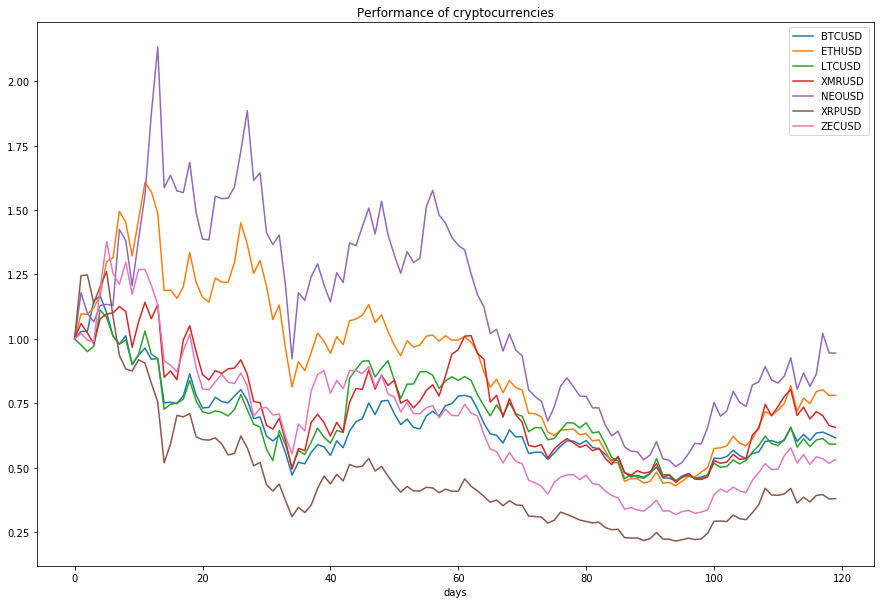

In [3]:
# Normalize prices by first value
norm_prices = crypto_prices.divide(crypto_prices.iloc[0])

plt.figure(figsize = (15, 10))
plt.plot(norm_prices)
plt.xlabel('days')
plt.title('Performance of cryptocurrencies')
plt.legend(assets)
plt.show()

### Cointegration test
The Null hypothesis is that there is no cointegration, the alternative hypothesis is that there is cointegrating relationship. If the pvalue is small, below a critical size, then we can reject the hypothesis that there is no cointegrating relationship.

In [7]:
for a1 in crypto_prices.columns:
    for a2 in crypto_prices.columns:
        if a1 != a2:
            test_result = ts.coint(crypto_prices[a1], crypto_prices[a2])
            print(a1 + ' and ' + a2 + ': p-value = ' + str(test_result[1]))

BTCUSD and ETHUSD: p-value = 0.06576979804268955
BTCUSD and LTCUSD: p-value = 0.07347140678450967
BTCUSD and XMRUSD: p-value = 0.021570889424181703
BTCUSD and NEOUSD: p-value = 0.10239483419041967
BTCUSD and XRPUSD: p-value = 0.00900122457399106
BTCUSD and ZECUSD: p-value = 0.16378128244807538
ETHUSD and BTCUSD: p-value = 0.31796015423321283
ETHUSD and LTCUSD: p-value = 0.609075825185015
ETHUSD and XMRUSD: p-value = 0.17284643088428048
ETHUSD and NEOUSD: p-value = 0.12876967722061067
ETHUSD and XRPUSD: p-value = 0.8353724771161415
ETHUSD and ZECUSD: p-value = 0.008516903095807236
LTCUSD and BTCUSD: p-value = 0.32518789859253106
LTCUSD and ETHUSD: p-value = 0.16681383335780392
LTCUSD and XMRUSD: p-value = 0.1740000549876129
LTCUSD and NEOUSD: p-value = 0.12495042850291554
LTCUSD and XRPUSD: p-value = 0.34798612459501926
LTCUSD and ZECUSD: p-value = 0.2208460047208785
XMRUSD and BTCUSD: p-value = 0.03688944104750657
XMRUSD and ETHUSD: p-value = 0.06850494599390901
XMRUSD and LTCUSD: p-va